In [1]:
# 匯入模組
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#匯入資料
data = pd.read_csv('data/electricity.csv')

In [3]:
# 針對用電量設定類別
def get_consumption_category(wt):
    if wt < 200:
        return 1
    elif 200 < wt < 400:
        return 2
    elif 400 < wt < 600:
        return 3
    elif 600 < wt < 800:
        return 4
    elif 800 < wt < 1000:
        return 5
    elif 1000 < wt < 1200:
        return 6
    else:
        return 7

data["electricity_consumption_category"] = data["electricity_consumption"].map(get_consumption_category)

In [4]:
df = data[['temperature','pressure', 'windspeed', 'electricity_consumption_category']]
array = df.values
X = array[:,0:3]
Y = array[:,3]

In [5]:
# prepare configuration for cross validation test harness
seed = 7

In [6]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [7]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.758570 (0.075302)
LDA: 0.754646 (0.075393)


C:\Users\LAB_JennyChiou\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\LAB_JennyChiou\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\LAB_JennyChiou\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\LAB_JennyChiou\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\LAB_JennyChiou\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


KNN: 0.727661 (0.081987)
CART: 0.611379 (0.076124)
NB: 0.724644 (0.099898)


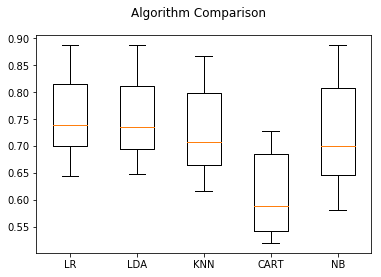

In [8]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

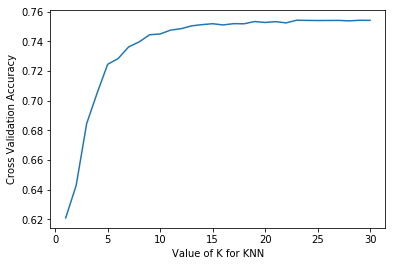

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

df = data[['temperature','pressure', 'windspeed', 'electricity_consumption_category']]
array = df.values
X = array[:,0:3]
Y = array[:,3]

results = []
k_range = range(1, 31)
scoring = 'accuracy'

for k in k_range:
    knn = KNeighborsClassifier(k)
    cv_results = model_selection.cross_val_score(knn, X, Y, cv=10, scoring=scoring)
    results.append(cv_results.mean())

plt.plot(k_range,results)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validation Accuracy')
plt.show()